In [92]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np 

### Extract CSVs into DataFrames

In [93]:
cyclist_file = "../ETL project/cyclist.csv"
cyclist_df = pd.read_csv(cyclist_file)
cyclist_df

,Date,Brooklyn Bridge
0,10/01/17,2297
1,10/02/17,3387
2,10/03/17,3386
3,10/04/17,3412
4,10/05/17,3312
5,10/06/17,2982
6,10/07/17,2750
7,10/08/17,1235
8,10/09/17,898
9,10/10/17,3922


In [94]:
pedestrian_file = ("../ETL project/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")
pedestrian_db = pd.read_csv(pedestrian_file)
pedestrian_db

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,02/05/18,Brooklyn Bridge,0,0,0,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,10/25/17,Brooklyn Bridge,2241,1201,1040,partly-cloudy-day,64.0,0.0008,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/01/17,Brooklyn Bridge,3,2,1,partly-cloudy-night,45.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,02/04/18,Brooklyn Bridge,6,5,1,rain,40.0,0.0671,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,01/11/18,Brooklyn Bridge,76,40,36,clear-night,44.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
5,12/30/17,Brooklyn Bridge,0,0,0,clear-night,16.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
6,10/27/17,Brooklyn Bridge,225,99,126,clear-night,54.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7,11/07/17,Brooklyn Bridge,2,1,1,clear-night,42.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8,10/03/17,Brooklyn Bridge,196,102,94,clear-night,58.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
9,12/31/17,Brooklyn Bridge,1724,915,809,partly-cloudy-day,14.0,0.0000,40.708164,-73.999509,New Year's Eve,"(40.7081639691088, -73.9995087014816)"


### Transform premise DataFrame

In [95]:
cyclist = ["Date", "Brooklyn Bridge"] 
cyclist_transform = cyclist_df[cyclist].copy()

cyclist_transform = cyclist_transform.rename(columns={"Date": "date",
                                                      "Brooklyn Bridge": "number_of_cyclists",
                                                          })
cyclist_transform.drop_duplicates("date", inplace=True)
cyclist_transform.set_index("date", inplace=True)
cyclist_transform.head()

,number_of_cyclists
date,
10/01/17,2297
10/02/17,3387
10/03/17,3386
10/04/17,3412
10/05/17,3312


### Transform county DataFrame

In [96]:
pedestrian = ["hour_beginning", "Pedestrians"]
pedestrian_transform = pedestrian_db[pedestrian].copy()

pedestrian_transform = pedestrian_transform.rename(columns = {"hour_beginning": "date", 
                                                     "Pedestrians": "number_of_pedestrians",
                                                     })

pedestrian_transform.drop_duplicates("date", inplace=True)
pedestrian_transform.set_index("date", inplace=True)
pedestrian_transform.head()

,number_of_pedestrians
date,
02/05/18,0
10/25/17,2241
12/01/17,3
02/04/18,6
01/11/18,76


### Create database connection

In [97]:
connection = "postgres:Franklin#4@localhost:5432/brooklyn"
engine = create_engine(f'postgresql://{connection}')

In [98]:
# Confirm tables
engine.table_names()

['cyclist', 'pedestrian']

### Load DataFrames into database

In [99]:
cyclist_transform.to_sql(name='cyclist', con=engine, if_exists='append', index=True)
pedestrian_transform.to_sql(name='pedestrian', con=engine, if_exists='append', index=True)

In [100]:
pd.read_sql_query('select * from cyclist', con=engine).head()

,id,date,number_of_cyclists
0,1,10/01/17,2297
1,2,10/02/17,3387
2,3,10/03/17,3386
3,4,10/04/17,3412
4,5,10/05/17,3312


In [101]:
pd.read_sql_query('select * from pedestrian', con=engine).head()

,id,date,number_of_pedestrians
0,1,02/05/18,0
1,2,10/25/17,2241
2,3,12/01/17,3
3,4,02/04/18,6
4,5,01/11/18,76


In [102]:
combined = pd.read_sql_query('''SELECT cyclist.id, cyclist.date, cyclist.number_of_cyclists, pedestrian.number_of_pedestrians
                    FROM cyclist
                    JOIN pedestrian
                    ON cyclist.date = pedestrian.date;''', con=engine)

In [110]:
combined.head()

,id,date,number_of_cyclists,number_of_pedestrians
0,87,10/25/17,3367,2241
1,56,10/25/17,3367,2241
2,25,10/25/17,3367,2241
3,89,10/27/17,3150,225
4,58,10/27/17,3150,225


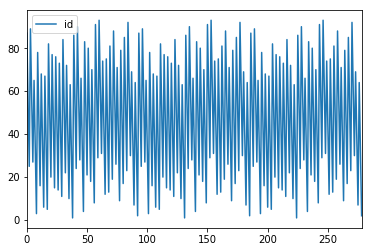

In [115]:
combined.plot()